In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [3]:
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [4]:
wec

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
columnas = ["country", "gdp", "fossil_share_energy", "renewables_share_energy", "low_carbon_share_energy", "nuclear_share_energy", 
"population", "energy_per_capita", "primary_energy_consumption"]
dff = wec[columnas]
dff

,country,gdp,fossil_share_energy,renewables_share_energy,low_carbon_share_energy,nuclear_share_energy,population,energy_per_capita,primary_energy_consumption
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,5085403.0,NaN,NaN
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,5118005.0,NaN,NaN
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,5150814.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2.503057e+10,NaN,NaN,NaN,NaN,13815000.0,4027.628,55.642
17428,Zimbabwe,2.515176e+10,NaN,NaN,NaN,NaN,14030000.0,3385.574,47.500
17429,Zimbabwe,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN,NaN
17430,Zimbabwe,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN,NaN


In [6]:
missing_values_by_country = dff.groupby('country').apply(lambda x: x.isnull().sum())
print(missing_values_by_country)


                                  country  gdp  fossil_share_energy  renewables_share_energy  low_carbon_share_energy  nuclear_share_energy  \
country                                                                                                                                       
Afghanistan                             0   53                  120                      120                      120                   120   
Africa                                  0  120                   65                       65                       65                    65   
Albania                                 0   49                  120                      120                      120                   120   
Algeria                                 0   73                   65                       65                       65                    65   
American Samoa                          0   40                   40                       40                       40                    40   

In [7]:
# Filtrar países con 15 o más valores nulos en alguna columna
countries_to_drop = missing_values_by_country[missing_values_by_country.drop('country', axis=1).ge(1).any(axis=1)]['country']

In [8]:
len(countries_to_drop)

242

In [9]:
drop_gdp = missing_values_by_country[missing_values_by_country['gdp'] >= 15]['country']

In [10]:
drop_gdp

country
Afghanistan                         0
Africa                              0
Albania                             0
Algeria                             0
American Samoa                      0
Angola                              0
Antigua and Barbuda                 0
Aruba                               0
Asia Pacific                        0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Belize                              0
Bermuda                             0
Bhutan                              0
Botswana                            0
British Virgin Islands              0
Brunei                              0
Bulgaria                            0
Burundi                             0
CIS                                 0
Cameroon                            0
Cayman Islands                      0
Central America                     0
China                               0
Congo                               0
Cook

In [11]:
len(drop_gdp)

129

In [12]:
drop_gdp.index

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Antigua and Barbuda', 'Aruba', 'Asia Pacific', 'Bahamas',
       ...
       'United States Pacific Islands', 'United States Virgin Islands', 'Vanuatu', 'Vietnam', 'Western Africa', 'Western Sahara', 'World',
       'Yugoslavia', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=129)

In [13]:
dff_filtered = dff.loc[~dff['country'].isin(drop_gdp.index)]
dff_filtered.shape

(7050, 9)

,country,gdp,fossil_share_energy,renewables_share_energy,low_carbon_share_energy,nuclear_share_energy,population,energy_per_capita,primary_energy_consumption
100,Afghanistan,1.650883e+10,NaN,NaN,NaN,NaN,20780000.0,277.985,5.777
101,Afghanistan,1.557484e+10,NaN,NaN,NaN,NaN,21607000.0,207.409,4.481
102,Afghanistan,2.567680e+10,NaN,NaN,NaN,NaN,22601000.0,188.554,4.262
103,Afghanistan,2.780556e+10,NaN,NaN,NaN,NaN,23681000.0,212.873,5.041
104,Afghanistan,2.844769e+10,NaN,NaN,NaN,NaN,24727000.0,188.813,4.669
...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2.503057e+10,NaN,NaN,NaN,NaN,13815000.0,4027.628,55.642
17428,Zimbabwe,2.515176e+10,NaN,NaN,NaN,NaN,14030000.0,3385.574,47.500
17429,Zimbabwe,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN,NaN
17430,Zimbabwe,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN,NaN


In [14]:
print(countries_to_drop)

country
Afghanistan                         0
Africa                              0
Albania                             0
Algeria                             0
American Samoa                      0
Angola                              0
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Aruba                               0
Asia Pacific                        0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize                              0
Benin                               0
Bermuda                             0
Bhutan                              0
Bolivia                             0
Bosnia and Herzegovina              0
Bots

In [15]:
type(countries_to_drop)

pandas.core.series.Series

In [16]:
# Calcular la cantidad de valores nulos por país
missing_values_by_country = dff.groupby('country').apply(lambda x: x.isnull().sum(axis=1))

# Filtrar países con 15 o más valores nulos en alguna columna
countries_to_drop = missing_values_by_country[missing_values_by_country >= 15].index

# Eliminar filas correspondientes a esos países en el dataset original
dff_filtrado = dff[~dff['country'].isin(countries_to_drop)]

# Mostrar el dataset resultante
dff_filtrado.shape


(17432, 9)

In [17]:
missing_values_by_country

country           
Afghanistan  0        7
             1        7
             2        7
             3        7
             4        7
                     ..
Zimbabwe     17427    4
             17428    4
             17429    7
             17430    7
             17431    7
Length: 17432, dtype: int64

In [18]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = wec.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

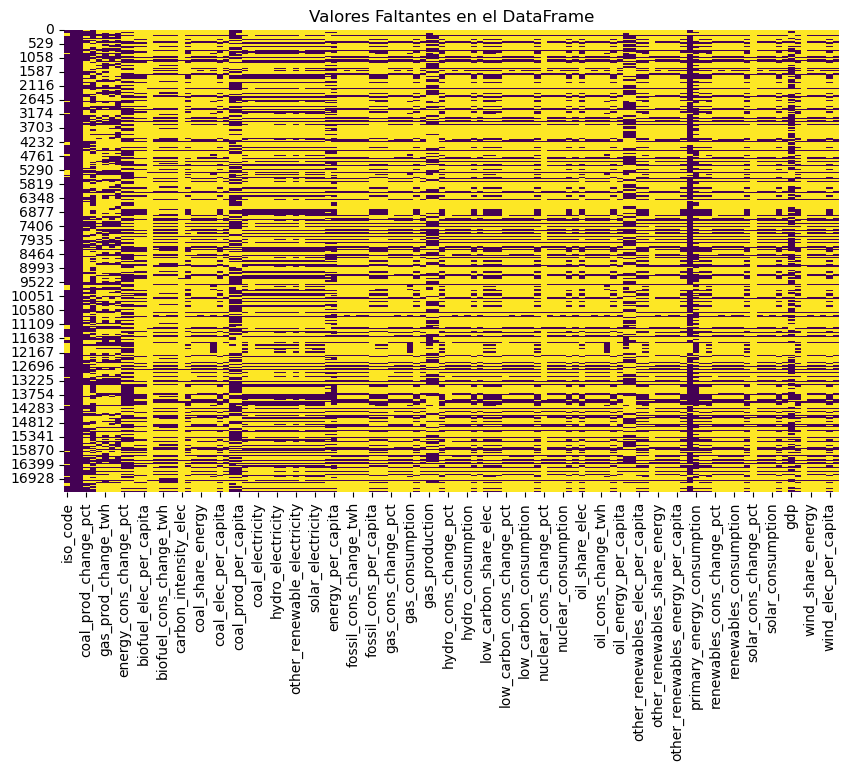

In [19]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

Descartando continentes y regiones:

In [20]:
print(wec["country"].unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia Pacific'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'CIS' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Central America' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Eastern Africa' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (other)' 'Faeroe Islands' 'Falkland Islands ' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' 'Gabon' '

In [21]:
regiones = ["World", "Europe", "Africa", "Europe (other)", "Eastern Africa", "Asia Pacific", "CIS", "Central America", "Other Caribbean",
'Other Middle East', 'Other Northern Africa', 'Other South America', 'Other Southern Africa', 'Western Africa', 'Other CIS',
 'South & Central America', 'South Africa', 'Other Northern Africa', 'Other Asia & Pacific', 'OPEC', 'North America',
  'Middle Africa', 'Middle East']

In [22]:
 wec2 = wec.loc[~wec['country'].isin(regiones)]

In [23]:
print(wec2["country"].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands ' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guadeloupe'

In [24]:
wec = wec2

In [25]:
wec = wec[(wec['year'] > 1999)]

In [26]:
wec.shape

(4414, 122)

In [27]:
colonias = ["United States Pacific Islands", "United States Virgin Islands", "British Virgin Islands",
  "French Polynesia", "French Guiana"]

In [28]:
 wec3 = wec.loc[~wec['country'].isin(colonias)]

In [29]:
wec3.shape

(4317, 122)

In [30]:
wec = wec3

In [31]:
# Filtrar las filas donde la columna 'country' contiene la palabra 'Islands'
wec4 = wec[~wec['country'].str.contains('Islands')]


In [32]:
wec4.shape

(4186, 122)

In [33]:
wec = wec4

In [34]:
wec.shape

(4186, 122)

Guardar como csv y volver a cargar

In [35]:
cadena = '_change'
# Filtra las columnas que no contienen la cadena
columnas_conservar = [col for col in wec.columns if cadena not in col]

wec_f = wec[columnas_conservar]
wec_f.shape

(4186, 90)

In [36]:
cadena2 = '_share'
# Filtra las columnas que no contienen la cadena
columnas_conservar2 = [col for col in wec_f.columns if cadena2 not in col]

wec_f2 = wec_f[columnas_conservar2]
wec_f2.shape

(4186, 66)

In [37]:
wec = wec_f

In [38]:
wec.head(10)

,iso_code,country,year,biofuel_share_elec,biofuel_elec_per_capita,biofuel_share_energy,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_share_energy,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_energy,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_share_energy,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_share_energy,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_share_energy,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_share_energy,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_share_energy,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_share_energy,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_share_energy,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_share_energy,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_share_energy,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
100,AFG,Afghanistan,2000,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.006,0.279,0.467,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.0,0.312,0.0,0.0,0.350,277.985,NaN,NaN,NaN,7.459,33.191,33.191,NaN,NaN,7.459,NaN,NaN,NaN,66.809,NaN,NaN,15.014,NaN,66.809,0.312,15.014,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,22.474,20780000.0,5.777,15.014,66.809,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,1.650883e+10,0.000,NaN,NaN,0.000,NaN
101,AFG,Afghanistan,2001,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.151,6.986,0.592,0.0,0.0,0.094,0.094,0.498,0.0,0.0,0.0,0.0,0.498,0.0,0.0,0.288,207.409,NaN,NaN,NaN,4.350,15.878,15.878,NaN,NaN,4.350,NaN,NaN,NaN,84.122,NaN,NaN,23.048,NaN,84.122,0.498,23.048,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,27.399,21607000.0,4.481,23.048,84.122,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,1.557484e+10,0.000,NaN,NaN,0.000,NaN
102,AFG,Afghanistan,2002,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.122,5.394,0.687,0.0,0.0,0.132,0.132,0.555,0.0,0.0,0.0,0.0,0.555,0.0,0.0,0.166,188.554,NaN,NaN,NaN,5.840,19.214,19.214,NaN,NaN,5.840,NaN,NaN,NaN,80.786,NaN,NaN,24.556,NaN,80.786,0.555,24.556,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,30.397,22601000.0,4.262,24.556,80.786,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,2.567680e+10,0.000,NaN,NaN,0.000,NaN
103,AFG,Afghanistan,2003,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.203,8.581,0.939,0.0,0.0,0.309,0.309,0.630,0.0,0.0,0.0,0.0,0.630,0.0,0.0,0.181,212.873,NaN,NaN,NaN,13.048,32.907,32.907,NaN,NaN,13.048,NaN,NaN,NaN,67.093,NaN,NaN,26.604,NaN,67.093,0.630,26.604,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,39.652,23681000.0,5.041,26.604,67.093,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,2.780556e+10,0.000,NaN,NaN,0.000,NaN
104,AFG,Afghanistan,2004,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.197,7.983,0.894,0.0,0.0,0.329,0.329,0.565,0.0,0.0,0.0,0.0,0.565,0.0,0.0,0.164,188.813,NaN,NaN,NaN,13.305,36.801,36.801,NaN,NaN,13.305,NaN,NaN,NaN,63.199,NaN,NaN,22.850,NaN,63.199,0.565,22.850,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,36.155,24727000

In [39]:
wec.to_csv("../datasets/wec_1980_sinreg.csv")

In [40]:
wec.to_csv("../datasets/wec_2000_sinreg.csv")

In [41]:
wec = pd.read_csv(r"../datasets/wec_1980_sinreg.csv")

In [42]:
graf = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


NameError: name 'suram' is not defined

In [43]:
sns.barplot(x='country', y="energy_per_capita", data=graf, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

NameError: name 'graf' is not defined

In [7]:
# filtro de paises
paises = ['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India', "Argentina", "Brazil", "Chile", "Bolivia"]
#filter columns
seleccion =wec.loc[wec['country'].isin(paises)]

In [38]:
seleccion.shape

(1385, 122)

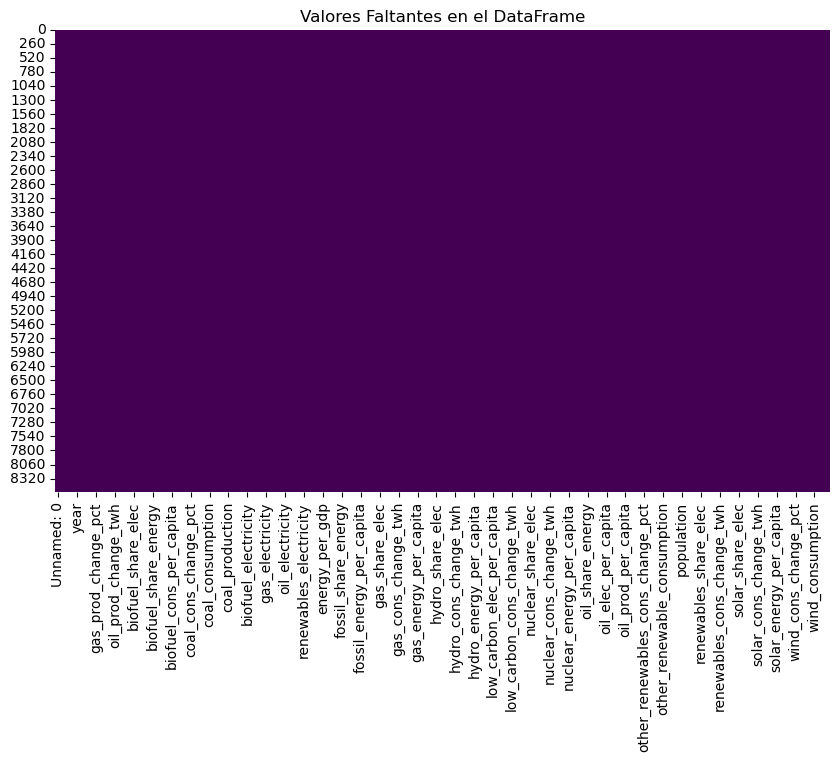

In [234]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [44]:
graf2 = seleccion.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)



NameError: name 'seleccion' is not defined

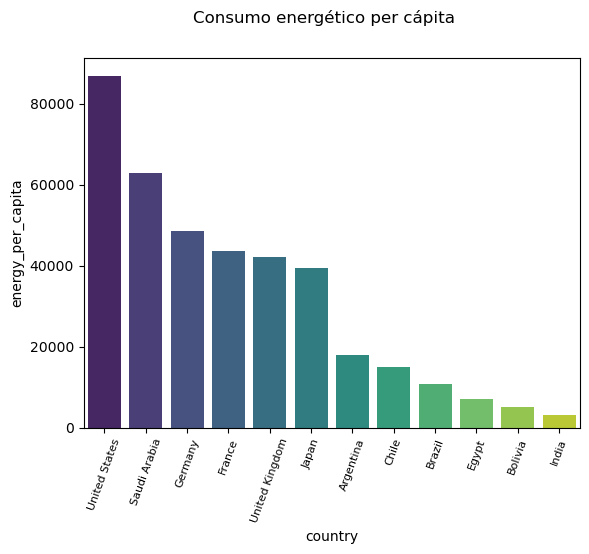

In [43]:
sns.barplot(x='country', y="energy_per_capita", data=graf2, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [45]:
nulls=suram.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        suram[i].ffill(inplace=True)
        suram[i].bfill(inplace=True)
suram.isna().sum()


NameError: name 'suram' is not defined

In [13]:
nulls2=wec.isna().sum()
for i in nulls2.index:
    if nulls2[i]>0:
        wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)
wec.isna().sum()

iso_code                                   0
country                                    0
year                                       0
biofuel_share_elec                         0
biofuel_elec_per_capita                    0
biofuel_share_energy                       0
biofuel_consumption                        0
biofuel_cons_per_capita                    0
carbon_intensity_elec                      0
coal_share_elec                            0
coal_share_energy                          0
coal_consumption                           0
coal_elec_per_capita                       0
coal_cons_per_capita                       0
coal_production                            0
coal_prod_per_capita                       0
electricity_generation                     0
biofuel_electricity                        0
coal_electricity                           0
fossil_electricity                         0
gas_electricity                            0
hydro_electricity                          0
nuclear_el

In [8]:
graf3 = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


NameError: name 'suram' is not defined

In [46]:
graf

,country,energy_per_capita
11,Trinidad and Tobago,89086.141782
13,Venezuela,28462.877436
8,Paraguay,22229.705351
10,Suriname,21651.165270
6,French Guiana,21580.134324
0,Argentina,17878.781909
3,Chile,15074.526964
12,Uruguay,14005.675189
2,Brazil,10757.510345
7,Guyana,7787.527514


In [47]:
graf3

,country,energy_per_capita
11,Trinidad and Tobago,89086.141782
13,Venezuela,23989.495950
8,Paraguay,22947.510225
6,French Guiana,21227.363550
9,Peru,19977.149231
4,Colombia,16620.250157
1,Bolivia,16058.760091
0,Argentina,15897.413438
3,Chile,15822.283562
12,Uruguay,14610.421707


Recursos:
https://www.gem.wiki/Energy_profile:_Trinidad_and_Tobago
https://ourworldindata.org/energy/country/trinidad-and-tobago#per-capita-what-is-the-average-energy-consumption-per-person

# Consumo de energia per cápita y PBI (todos los países)

In [211]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'energy_per_capita': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

In [212]:
g1 = mean_values.sort_values("energy_per_capita", ascending=False)

In [213]:
g1.head(20)

,country,energy_per_capita,gdp
76,Gibraltar,877841.144675,1.000000e+11
159,Qatar,225705.332400,1.034355e+11
209,United States Virgin Islands,223684.883250,1.720000e+13
205,United Arab Emirates,155922.984200,4.384500e+11
13,Bahrain,149517.080575,2.490023e+10
90,Iceland,117589.597000,9.806153e+09
176,Singapore,114564.999366,1.748523e+11
33,Canada,109242.251805,1.113195e+12
147,Norway,104067.727317,2.444146e+11
197,Trinidad and Tobago,104045.742025,2.197852e+10


c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


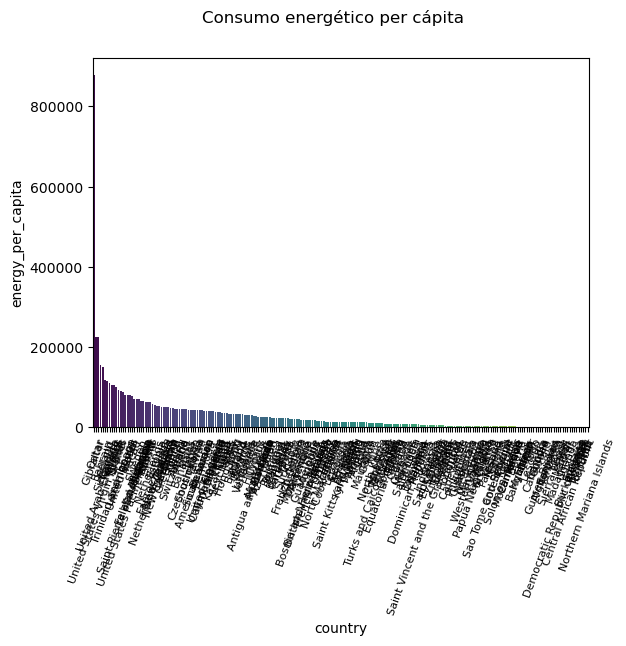

In [214]:
sns.barplot(x='country', y="energy_per_capita", data=g1, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

Filtramos los países con población menor a dos desviaciones estándar

In [137]:

# Calcular la media y la desviación estándar de la población
mean_population = wec['population'].mean()
std_population = wec['population'].std()

# Filtrar el DataFrame original
wec_filtrado = wec[wec['population'] >= (mean_population -  std_population)]
wec_filtrado.shape

(8093, 122)

In [138]:
# Ordenar el DataFrame por población de forma ascendente
wec_sorted = wec.sort_values(by='population')

In [139]:
wec_sorted

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
11116,NIU,Niue,1988,0.000,0.000,2.092,10.096,5.251,58.753,0.000,0.000,0.070,0.129,15.815,0.000,0.000,0.000,0.000,318.0,0.000,14.228,6.770,2.147,17.235,0.000,3603.389,0.000,0.000,38.019,0.027,0.000,30.807,30.807,7.152,0.0,0.000,0.027,0.0,7.211,0.03,0.003,0.512,6365.285,4.094,64.587,6.467,164.422,34376.311,149.448,81.032,81.032,8.859,18.853,3.906,47.996,149.448,10034.623,492.792,2452.140,18.811,-3.038,24.887,-1.985,63.355,34.694,13245.875,18.968,7.211,34.983,-1.493,35.400,-1.366,90.120,18841.714,0.000,10.828,0.000,0.000,0.000,0.000,0.000,0.000,0.419,38.964,0.414,99.191,0.000,20738.298,1177.611,5859.811,0.129,0.070,0.513,8.197,0.107,20.866,4362.602,184.431,2.000000e+03,0.013,34.983,18.968,-1.493,35.400,-1.366,90.120,18841.714,0.079,27.236,0.123,0.067,0.314,0.146,65.689,9.900000e+11,0.008,8.658,2.194,0.445,5.584,0.015,1167.548
11130,NIU,Niue,2002,0.000,0.000,2.092,10.096,5.251,58.753,-3.525,-0.001,0.000,0.000,15.815,0.000,0.000,0.000,0.000,318.0,0.000,14.228,6.770,2.147,17.235,0.000,3603.389,0.000,0.000,0.003,0.000,0.000,0.003,0.000,0.000,0.0,0.003,0.000,0.0,0.000,0.00,0.000,0.512,14050.552,4.094,64.587,6.467,164.422,34376.311,1500.000,100.000,0.000,8.859,18.853,3.906,47.996,0.000,10034.623,492.792,2452.140,0.000,-3.038,24.887,-1.985,63.355,0.000,13245.875,0.000,0.000,0.000,-1.493,35.400,-1.366,90.120,18841.714,0.000,10.828,0.000,0.000,0.000,0.000,0.000,100.000,0.419,38.964,0.414,99.191,1500.000,2

In [215]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values3 = wec.groupby('country').agg({'population': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
pop = pd.DataFrame({'country': mean_values3['country'],
                          'mean_pop': mean_values3['population'],
                          'mean_gdp': mean_values3['gdp']})

In [216]:
pop1 = mean_values3.sort_values("population", ascending=False)
pop1.head(20)

,country,population,gdp
39,China,1.262979e+09,7.607073e+12
91,India,1.050722e+09,3.113537e+12
208,United States Pacific Islands,3.290650e+08,1.720000e+13
207,United States,2.805326e+08,1.238098e+13
92,Indonesia,2.099333e+08,1.142675e+12
25,Brazil,1.716585e+08,1.677951e+12
162,Russia,1.448782e+08,2.441220e+12
149,Pakistan,1.442579e+08,5.064878e+11
142,Nigeria,1.284079e+08,5.586098e+11
99,Japan,1.258928e+08,3.831951e+12


In [217]:
pop1.tail(20)

,country,population,gdp
5,Antigua and Barbuda,76025.000000,1.480000e+11
54,Dominica,71400.000000,5.644950e+08
20,Bermuda,63075.000000,2.326501e+10
78,Greenland,55500.000000,2.640000e+11
3,American Samoa,51425.000000,5.340000e+11
65,Falkland Islands,48000.000000,1.840000e+11
64,Faeroe Islands,46648.648649,1.840000e+11
146,Northern Mariana Islands,46378.378378,2.916270e+10
165,Saint Kitts and Nevis,45250.000000,2.020430e+10
35,Cayman Islands,40350.000000,3.601136e+09


c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


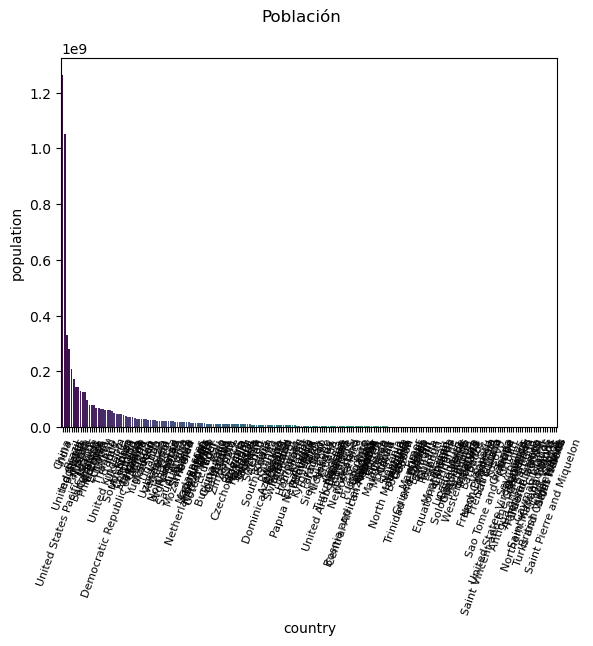

In [219]:
sns.barplot(x='country', y="population", data=pop1, palette="viridis")
plt.suptitle('Población')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [144]:


# Seleccionar las filas correspondientes a los 20 países con menor población
countries_to_remove = wec_sorted.head(20)

# Eliminar esas filas del DataFrame original
wec_filtered = wec[~wec['country'].isin(countries_to_remove['country'])]

# Muestra el DataFrame resultante
print(wec_filtered)


      iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
80         AFG  Afghanistan  1980               -35.709                -0.384              -29.942               -1.313               21.949   
81         AFG  Afghanistan  1981                 5.042                 0.035              -29.942               -1.313               21.949   
82         AFG  Afghanistan  1982                16.000                 0.116              -29.942               -1.313               21.949   
83         AFG  Afghanistan  1983                 0.000                 0.000              -29.942               -1.313               21.949   
84         AFG  Afghanistan  1984                 2.069                 0.017              -29.942               -1.313               21.949   
...        ...          ...   ...                   ...                   ...                  ...                  ...                 

In [220]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values2 = wec.groupby('country').agg({'energy_per_capita': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

In [221]:
g2 = mean_values2.sort_values("energy_per_capita", ascending=False)

In [222]:
g2.head(20)

,country,energy_per_capita,gdp
76,Gibraltar,877841.144675,1.000000e+11
159,Qatar,225705.332400,1.034355e+11
209,United States Virgin Islands,223684.883250,1.720000e+13
205,United Arab Emirates,155922.984200,4.384500e+11
13,Bahrain,149517.080575,2.490023e+10
90,Iceland,117589.597000,9.806153e+09
176,Singapore,114564.999366,1.748523e+11
33,Canada,109242.251805,1.113195e+12
147,Norway,104067.727317,2.444146e+11
197,Trinidad and Tobago,104045.742025,2.197852e+10


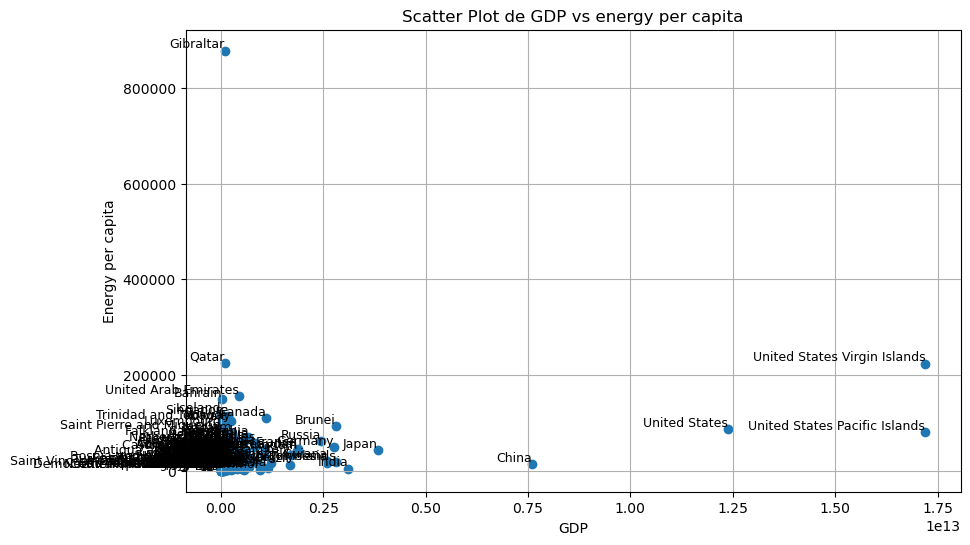

In [223]:
# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(g2['gdp'], g2['energy_per_capita'])
for i, country in enumerate(g2["country"]):
    plt.text(g2["gdp"].iloc[i], g2["energy_per_capita"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs energy per capita')
plt.xlabel('GDP')
plt.ylabel('Energy per capita')
plt.grid(True)
plt.show()

In [224]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values2 = wec.groupby('country').agg({'energy_per_capita': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

g2 = mean_values2.sort_values("energy_per_capita", ascending=False)

g2.head(20)

,country,energy_per_capita,gdp
76,Gibraltar,877841.144675,1.000000e+11
159,Qatar,225705.332400,1.034355e+11
209,United States Virgin Islands,223684.883250,1.720000e+13
205,United Arab Emirates,155922.984200,4.384500e+11
13,Bahrain,149517.080575,2.490023e+10
90,Iceland,117589.597000,9.806153e+09
176,Singapore,114564.999366,1.748523e+11
33,Canada,109242.251805,1.113195e+12
147,Norway,104067.727317,2.444146e+11
197,Trinidad and Tobago,104045.742025,2.197852e+10


c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


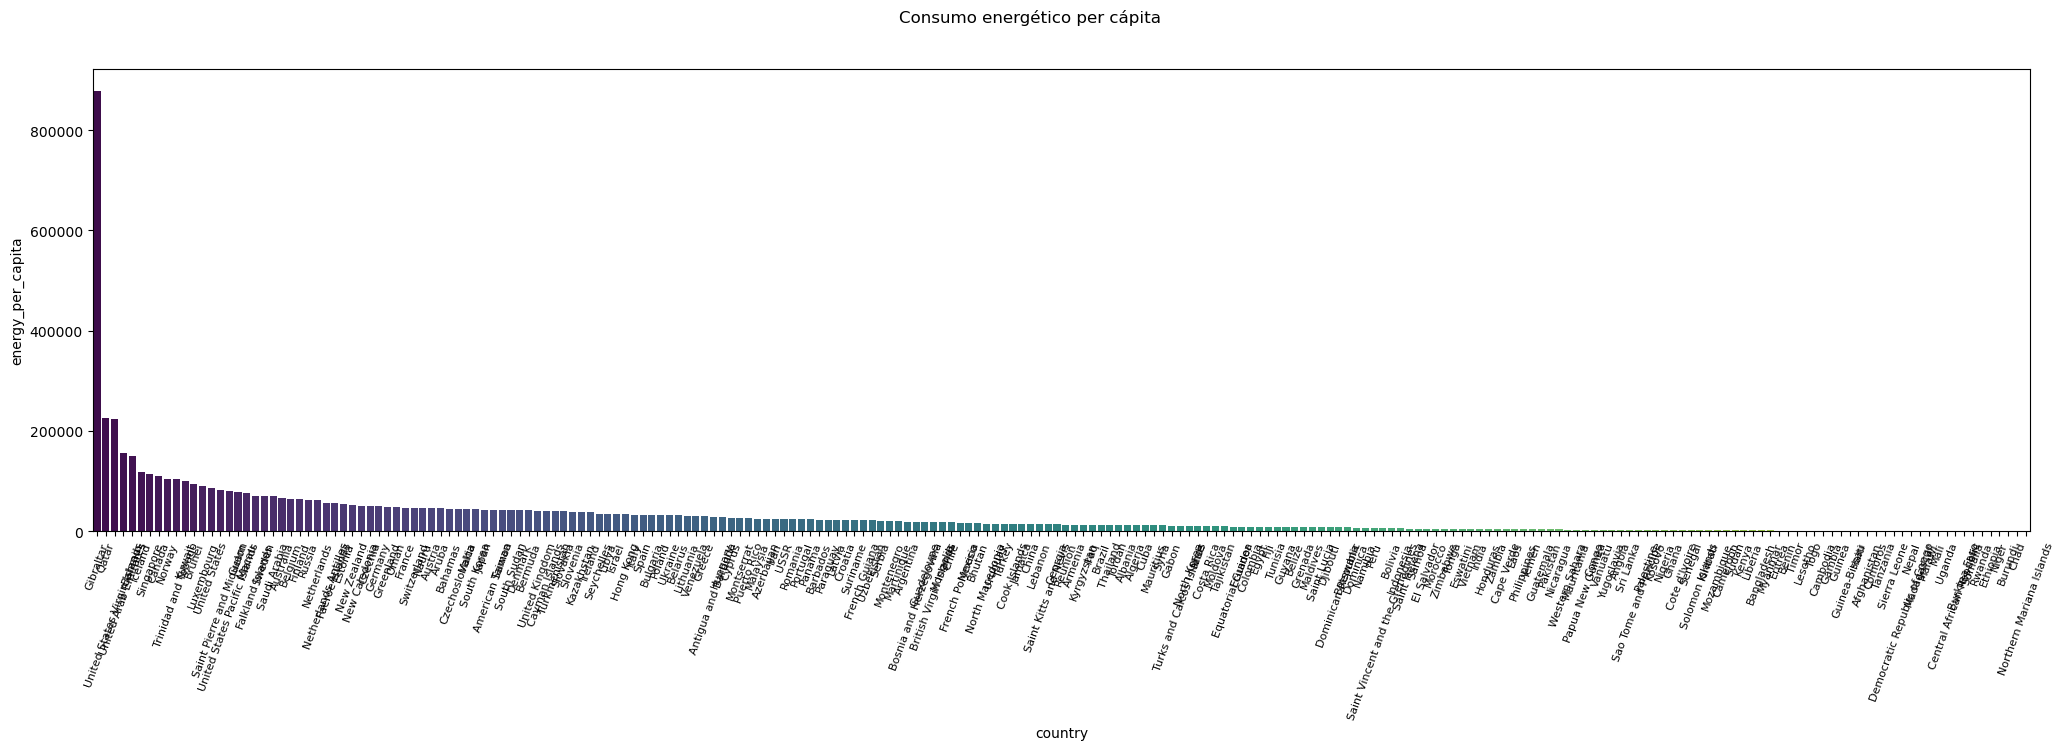

In [225]:
plt.figure(figsize=(25, 6))
sns.barplot(x='country', y="energy_per_capita", data=g2, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [226]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_pec = wec.groupby('country').agg({'primary_energy_consumption': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df2 = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

In [227]:
g3 = mean_pec.sort_values("primary_energy_consumption", ascending=False)

In [228]:
g3.head(20)

,country,primary_energy_consumption,gdp
207,United States,24205.878317,1.238098e+13
39,China,18004.591341,7.607073e+12
202,USSR,14639.813941,1.180000e+11
162,Russia,8972.812439,2.441220e+12
99,Japan,5382.157366,3.831951e+12
91,India,4358.553171,3.113537e+12
74,Germany,3960.827610,2.754146e+12
33,Canada,3366.701610,1.113195e+12
68,France,2765.316293,1.874146e+12
206,United Kingdom,2462.719634,1.873171e+12


In [229]:
g4 = mean_pec.sort_values("gdp", ascending=False)
g4.head(20)

,country,primary_energy_consumption,gdp
208,United States Pacific Islands,1.078622,1.720000e+13
209,United States Virgin Islands,23.876275,1.720000e+13
207,United States,24205.878317,1.238098e+13
39,China,18004.591341,7.607073e+12
99,Japan,5382.157366,3.831951e+12
91,India,4358.553171,3.113537e+12
26,British Virgin Islands,0.415275,2.810000e+12
27,Brunei,30.566225,2.810000e+12
74,Germany,3960.827610,2.754146e+12
70,French Polynesia,3.937125,2.600000e+12


In [230]:
g4.tail(20)

,country,primary_energy_consumption,gdp
123,Mauritania,8.107200,6.310535e+09
175,Sierra Leone,3.489950,6.017290e+09
15,Barbados,6.245475,3.970190e+09
110,Lesotho,2.160825,3.821778e+09
35,Cayman Islands,1.704100,3.601136e+09
36,Central African Republic,1.575275,3.455231e+09
72,Gambia,1.322400,2.583986e+09
85,Guyana,6.099700,2.381686e+09
111,Liberia,3.868200,2.040818e+09
53,Djibouti,4.622225,1.777942e+09


c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


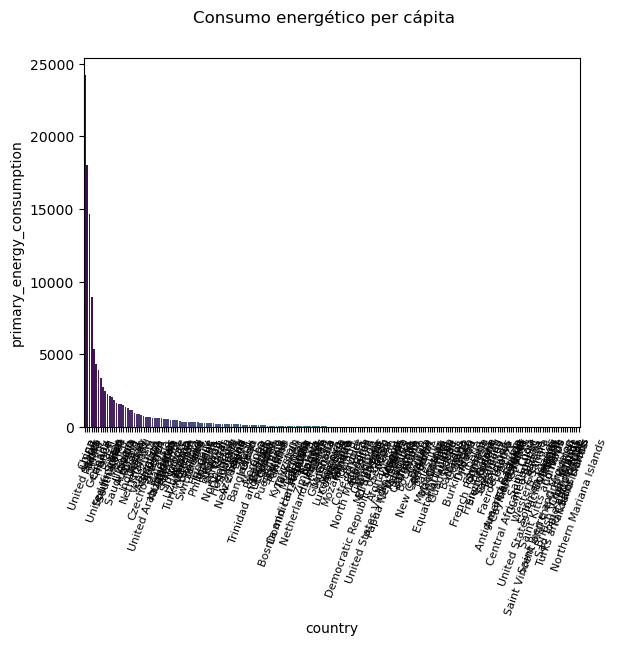

In [71]:
sns.barplot(x='country', y="primary_energy_consumption", data=g3, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

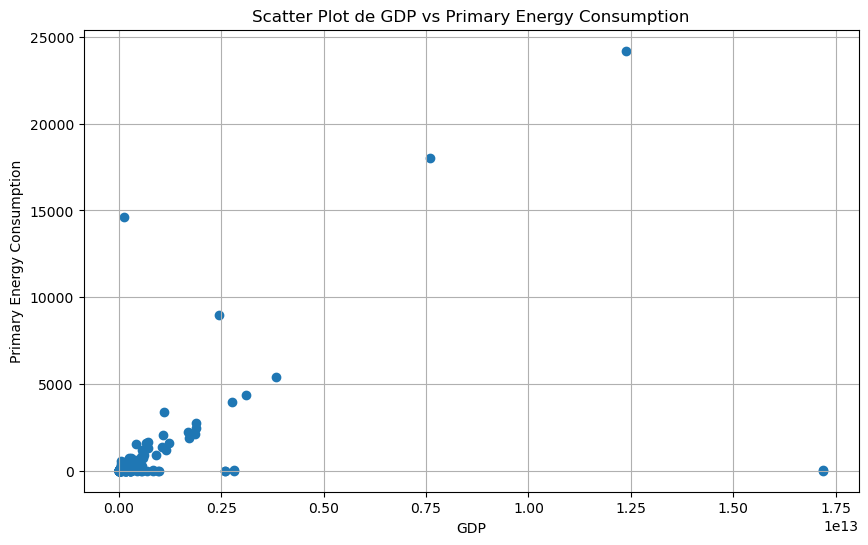

In [232]:
# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_pec['gdp'], mean_pec['primary_energy_consumption'])
plt.title('Scatter Plot de GDP vs Primary Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Primary Energy Consumption')
plt.grid(True)
plt.show()


# MODELO NO SUPERVISADO

In [4]:
# Se importan las librerías que se utilizarán: 
# import pandas as pd
# import numpy as np
import sklearn
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.cluster import KMeans
# import re
# import array
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [80]:
# features = ["energy_per_capita", "renewables_electricity", "energy_per_gdp", "gdp", "population"]
features = ["mean_epc", "gdp"]
X = wec[features]
# X = suram[features]
X.head(5)

,mean_epc,gdp
0,671.665142,1.949480e+10
1,671.665142,1.949480e+10
2,671.665142,1.949480e+10
3,671.665142,1.949480e+10
4,671.665142,1.949480e+10


In [81]:
X.head(5)

,mean_epc,gdp
0,671.665142,1.949480e+10
1,671.665142,1.949480e+10
2,671.665142,1.949480e+10
3,671.665142,1.949480e+10
4,671.665142,1.949480e+10


In [91]:
df.shape

(242, 3)

In [96]:
X = df[["mean_epc", "mean_gdp"]]

<Axes: xlabel='mean_epc', ylabel='mean_gdp'>

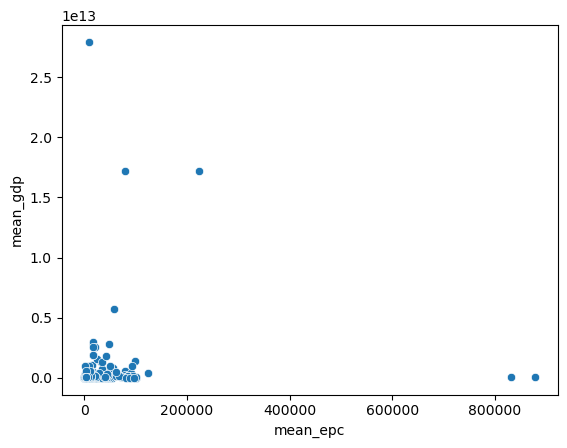

In [115]:
sns.scatterplot(data=X, x="mean_epc", y="mean_gdp")

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X)

print(X_scal)

[[-4.10010585e-01 -2.06786695e-01]
 [-3.90557634e-01 -1.91385436e-01]
 [-3.32929088e-01 -2.14673996e-01]
 [-2.71032915e-01 -1.60689346e-01]
 [ 1.05425103e-01  3.33034177e-03]
 [-1.91645897e-01 -7.17862307e-02]
 [-5.71240251e-02 -1.56686432e-01]
 [-1.00062508e-01 -9.79819266e-02]
 [-2.58870437e-01 -2.10706038e-01]
 [ 1.41940061e-01 -2.06437814e-01]
 [ 2.22031253e-01 -2.06437814e-01]
 [ 2.73598365e-01 -8.88661424e-02]
 [ 2.94062668e-01 -1.68041879e-01]
 [-1.17831734e-01 -1.86228513e-01]
 [ 1.40223208e-01 -1.57930086e-01]
 [ 4.71075650e-01 -1.79366893e-01]
 [ 6.22478464e-01 -1.64740849e-01]
 [-1.33230029e-01 -2.16394167e-01]
 [-2.54726150e-02 -1.65542784e-01]
 [ 1.43011746e-01 -1.52333951e-01]
 [-3.21111035e-01 -3.23210638e-02]
 [-4.04327448e-01 -2.13100522e-01]
 [ 9.32593789e-02 -2.08395477e-01]
 [-2.19053841e-01 -2.08395477e-01]
 [-1.19736587e-01 -2.12352644e-01]
 [-1.92299372e-01 -2.06357306e-01]
 [-1.86455449e-01 -2.08472797e-01]
 [-2.90998761e-01  5.06008404e-02]
 [-1.95890206e-01  9

In [99]:
pd.DataFrame(X_scal).head(5)

,0,1
0,-0.410011,-0.206787
1,-0.390558,-0.191385
2,-0.332929,-0.214674
3,-0.271033,-0.160689
4,0.105425,0.003330


In [100]:
pd.DataFrame(X_scal).shape

(242, 2)

In [103]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

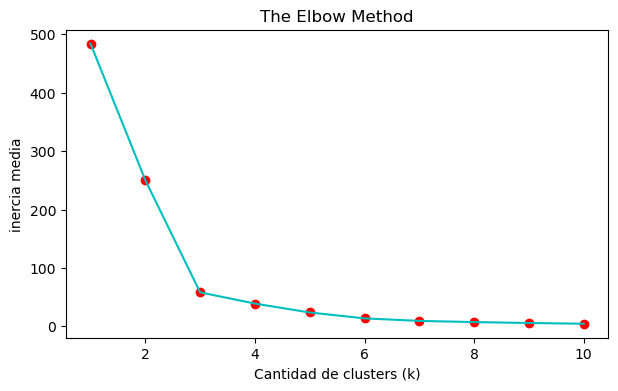

In [104]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

In [105]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

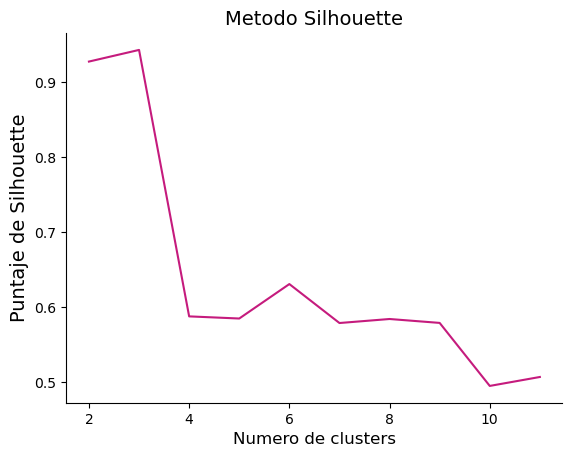

In [107]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [108]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=3, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

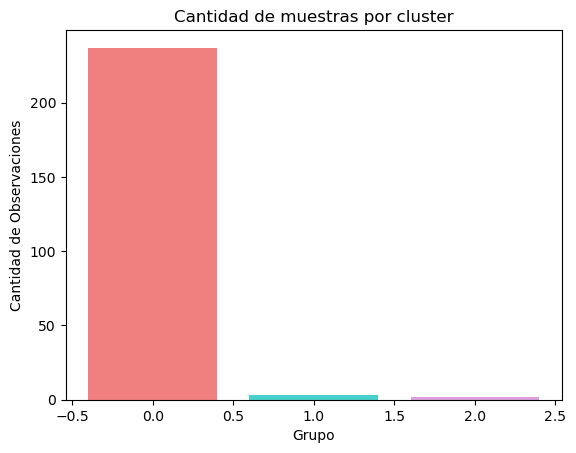

In [109]:
#Se verifica la cantidad de observaciones
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


In [110]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[-0.09703593 -0.10473714]
 [ 0.87602911  8.39237741]
 [10.18471446 -0.17721454]]


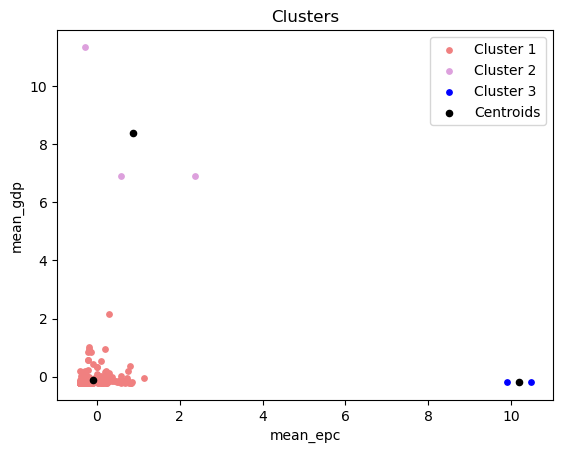

In [113]:
plt.scatter(X_scal[y_means2 == 0, 0], X_scal[y_means2 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means2 == 1, 0], X_scal[y_means2 == 1, 1], s = 15, c = 'plum', label = 'Cluster 2')
plt.scatter(X_scal[y_means2 == 2, 0], X_scal[y_means2 == 2, 1], s = 15, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_epc')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

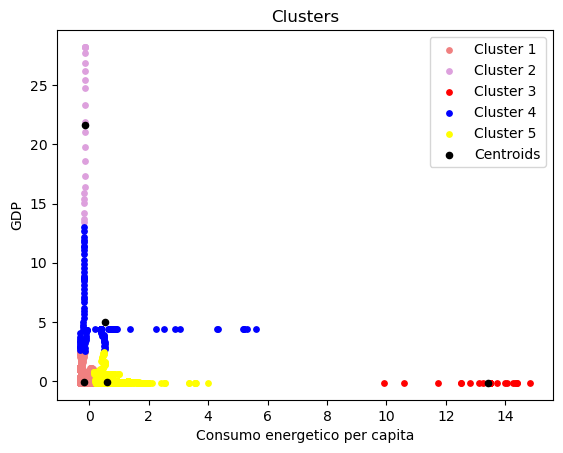

In [70]:
plt.scatter(X_scal[y_means2 == 0, 0], X_scal[y_means2 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means2 == 1, 0], X_scal[y_means2 == 1, 1], s = 15, c = 'plum', label = 'Cluster 2')
plt.scatter(X_scal[y_means2 == 2, 0], X_scal[y_means2 == 2, 1], s = 15, c = 'red', label = 'Cluster 3')
plt.scatter(X_scal[y_means2 == 3, 0], X_scal[y_means2 == 3, 1], s = 15, c = 'blue', label = 'Cluster 4')
plt.scatter(X_scal[y_means2 == 4, 0], X_scal[y_means2 == 4, 1], s = 15, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Consumo energetico per capita')
plt.ylabel('GDP')
plt.legend()
plt.show()